In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
#Load csv or Data
red_df=pd.read_csv('winequality-red.csv',sep=';')
white_df=pd.read_csv('winequality-white.csv',sep=';')
red_df.columns.to_list()


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [50]:
def preprocess(df):
    df = df.copy()
    if 'quality' not in df.columns:
        raise ValueError("The 'quality' column is missing from the DataFrame.")
    df['quality'] = (df['quality'] >= 6).astype(int)
    return df


In [51]:
red_df = preprocess(red_df)
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [52]:
def run_pipeline(df, wine_type="Red"):
    X = df.drop('quality', axis=1)
    y = df['quality']
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # PCA (retain 95% variance)
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Logistic Regression
    clf = LogisticRegression()
    clf.fit(X_train_pca, y_train)
    
    # Predict & Evaluate
    y_pred = clf.predict(X_test_pca)
    
    print(f"\n----- {wine_type} Wine -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [53]:
run_pipeline(red_df, wine_type="Red")
run_pipeline(white_df, wine_type="White")



----- Red Wine -----
Accuracy: 0.74375
Confusion Matrix:
 [[106  35]
 [ 47 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320


----- White Wine -----
Accuracy: 0.5204081632653061
Confusion Matrix:
 [[  0   0   2   2   0   1   0]
 [  0   1  14  10   0   0   0]
 [  0   1 152 136   2   0   0]
 [  0   0  80 319  32   0   1]
 [  0   0  16 138  38   0   0]
 [  0   0   2  26   7   0   0]
 [  0   0   0   0   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.04      0.07        25
           5       0.57      0.52      0.55       291
           6       0.51      0.74   

c:\Users\Mr. Nitin\Desktop\quantum_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mr. Nitin\Desktop\quantum_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mr. Nitin\Desktop\quantum_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\

In [54]:
def run_pipeline_with_plots(df, wine_type="Red"):
    X = df.drop('quality', axis=1)
    y = df['quality']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # PCA
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Plot explained variance
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.title(f'{wine_type} Wine - PCA Explained Variance')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Logistic Regression
    clf = LogisticRegression()
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n----- {wine_type} Wine -----")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{wine_type} Wine - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.legend()
    plt.show()


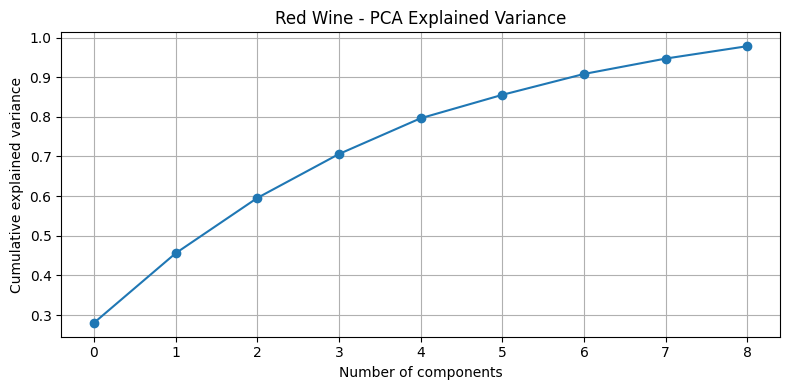


----- Red Wine -----
Accuracy: 0.74375
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



C:\Users\Mr. Nitin\AppData\Local\Temp\ipykernel_15568\2856173622.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


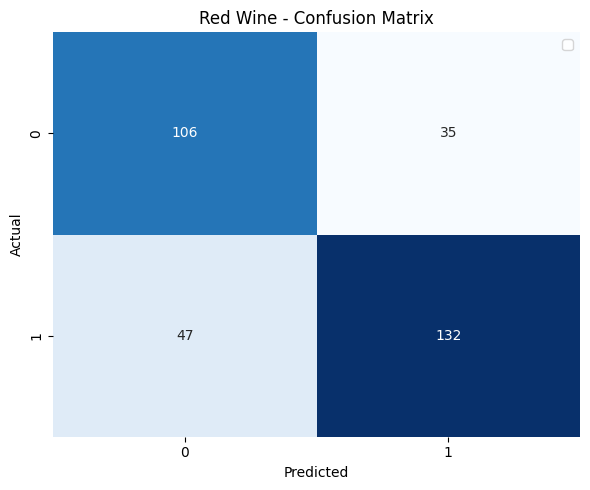

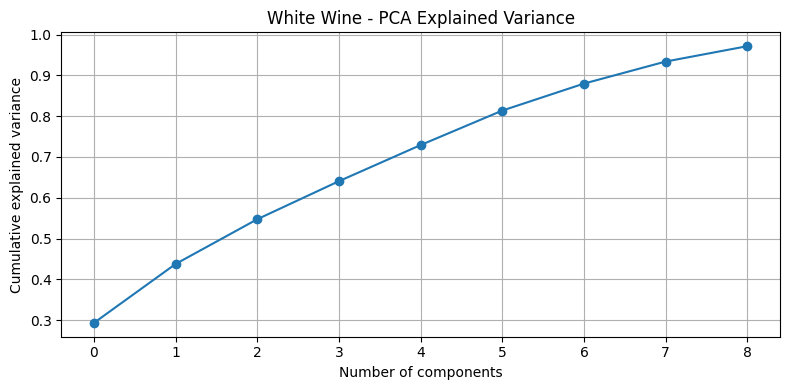


----- White Wine -----
Accuracy: 0.5204081632653061
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.04      0.07        25
           5       0.57      0.52      0.55       291
           6       0.51      0.74      0.60       432
           7       0.48      0.20      0.28       192
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         0

    accuracy                           0.52       980
   macro avg       0.29      0.21      0.21       980
weighted avg       0.50      0.52      0.48       980



c:\Users\Mr. Nitin\Desktop\quantum_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mr. Nitin\Desktop\quantum_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mr. Nitin\Desktop\quantum_ML\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\

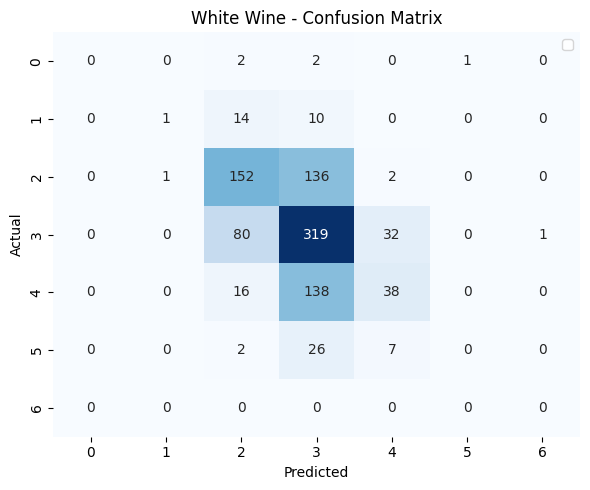

In [55]:
run_pipeline_with_plots(red_df, wine_type="Red")
run_pipeline_with_plots(white_df, wine_type="White")
